# TimeSeries Udang Size 50

Notebook ini berisi tentang pembuatan model predict terhadap harga data udang yang jumlah udangnya berjumlah 50 dalam 1kg, Pemilihan Model Predict ini berdasarkan acuan metrics MAE dan MAPE 

# Library

In [1]:
# Libary untuk proses Data
import numpy as np
import pandas as pd
import pickle

# Library untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

# Library Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Library Metriks
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df_ori = pd.read_csv("shrimp_prices_week.csv")
df_ori

,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,province_id
0,2018-09-16,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000,35.0
1,2018-09-23,100000.000000,88666.666667,80333.333333,76333.333333,73333.333333,70333.333333,64333.333333,35.0
2,2018-09-30,99000.000000,87333.333333,79666.666667,75666.666667,72666.666667,69666.666667,63666.666667,35.0
3,2018-10-07,98000.000000,86000.000000,79000.000000,75000.000000,72000.000000,69000.000000,63000.000000,35.0
4,2018-10-14,97000.000000,84666.666667,78333.333333,74333.333333,71333.333333,68333.333333,62333.333333,35.0
...,...,...,...,...,...,...,...,...,...
309,2024-08-18,80000.000000,75000.000000,68000.000000,65000.000000,62000.000000,60000.000000,53000.000000,35.0
310,2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094,35.0
311,2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769,35.0
312,2024-09-08,80000.000000,74000.000000,68000.000000,66000.000000,62000.000000,60000.000000,54000.000000,35.0


terdapat 314 baris dan 9 kolom 

# Data Cleaning

In [4]:
df_50 = df_ori[['date','size_50']]
df_50

,date,size_50
0,2018-09-16,81000.000000
1,2018-09-23,80333.333333
2,2018-09-30,79666.666667
3,2018-10-07,79000.000000
4,2018-10-14,78333.333333
...,...,...
309,2024-08-18,68000.000000
310,2024-08-25,67514.150943
311,2024-09-01,69307.692308
312,2024-09-08,68000.000000


Pengurangan jumlah kolom yang digunakan menjadi hanya 1 yaitu kolom harga udang size 50 saja

In [5]:
df_50 =df_50.rename(columns={"date":"Week"})


merubah nama kolom date menjadi week

In [6]:
df_50['Week'] = pd.to_datetime(df_50['Week'])
df_50.set_index('Week',inplace=True)
df_50.head()

,size_50
Week,
2018-09-16,81000.000000
2018-09-23,80333.333333
2018-09-30,79666.666667
2018-10-07,79000.000000
2018-10-14,78333.333333


merubah kolom week menjadi index

 # EDA

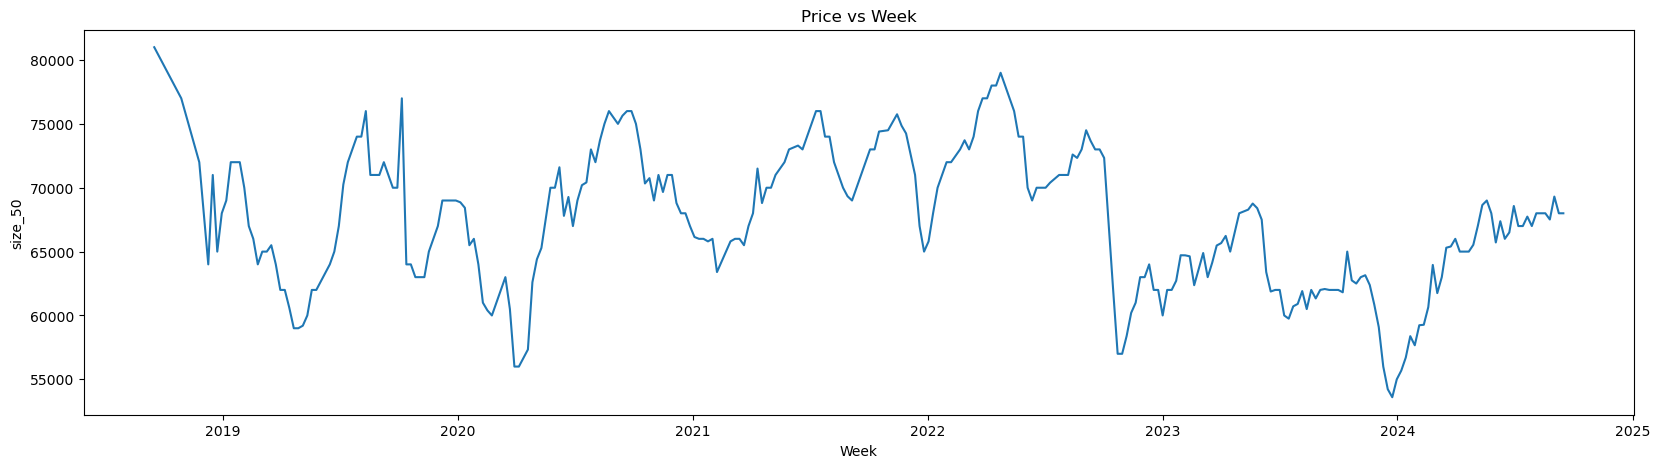

In [7]:
# Visualisasi data
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df_50.index ,y = 'size_50',data = df_50)
plt.title('Price vs Week');

Grafik Harga Udang size 50 pertahun mulai dari pertengahan tahun 2018 hingga pertengahan tahun 2024 dilihat dari grafik pertahun harga udang mengalami penurunan dan mengalami harga paling rendah pada akhir tahun 2023

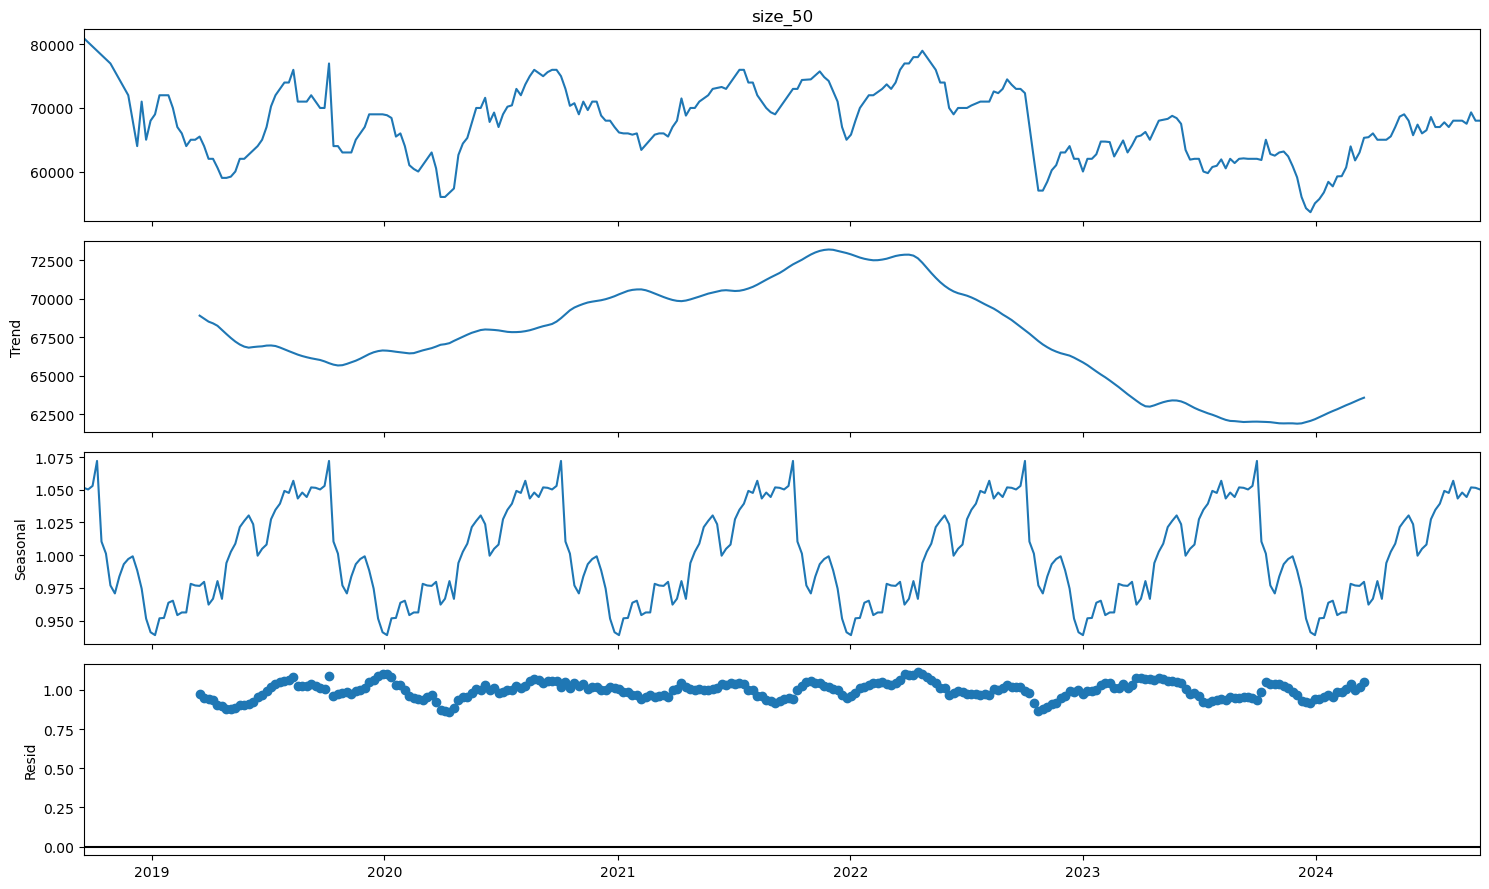

In [8]:
# Dekomposisi timeseries

pylab.rcParams['figure.figsize'] = (15, 9)
res = seasonal_decompose(df_50['size_50'], model='multiplicatif')
ax=res.plot()
plt.show()

In [9]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [10]:
# Check stationarity of the dataset

check_stationarity(df_50['size_50'])

ADF Statistic: -4.028681
p-value: 0.001268
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Stationary


Data sudah stationary maka  tidak diperlukan differencing

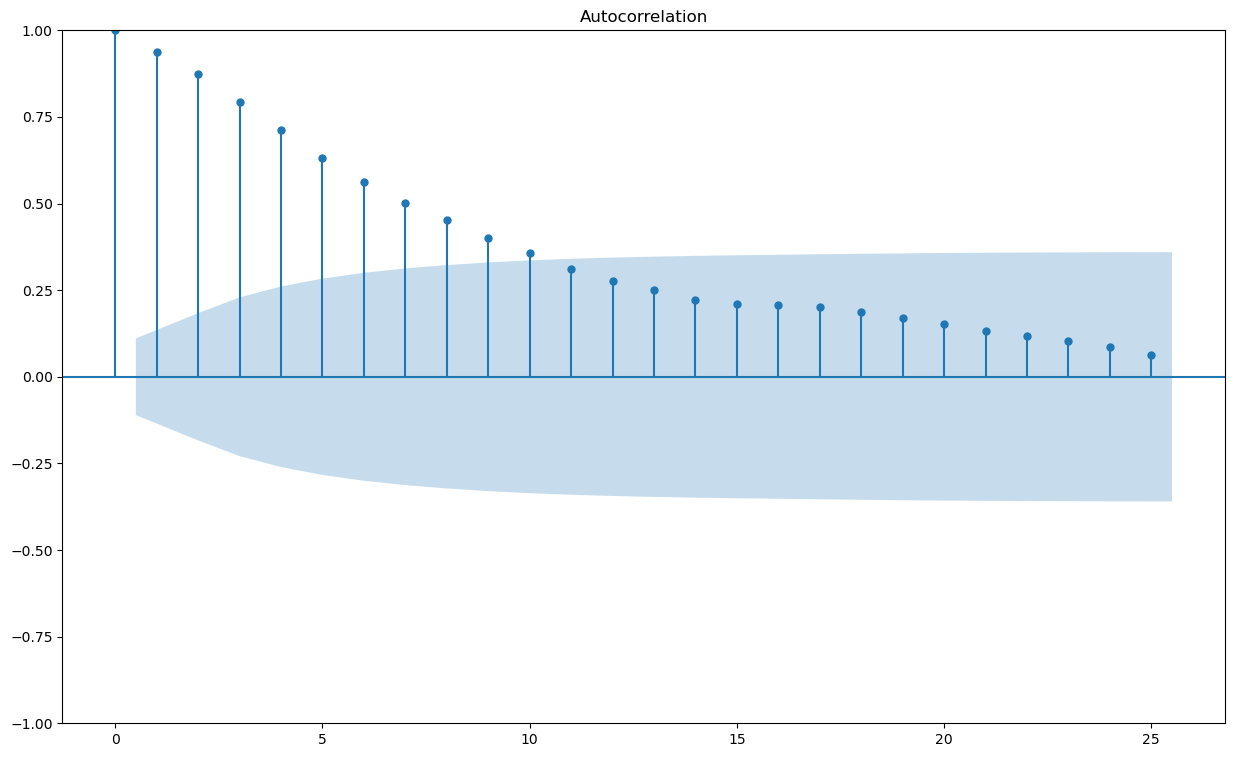

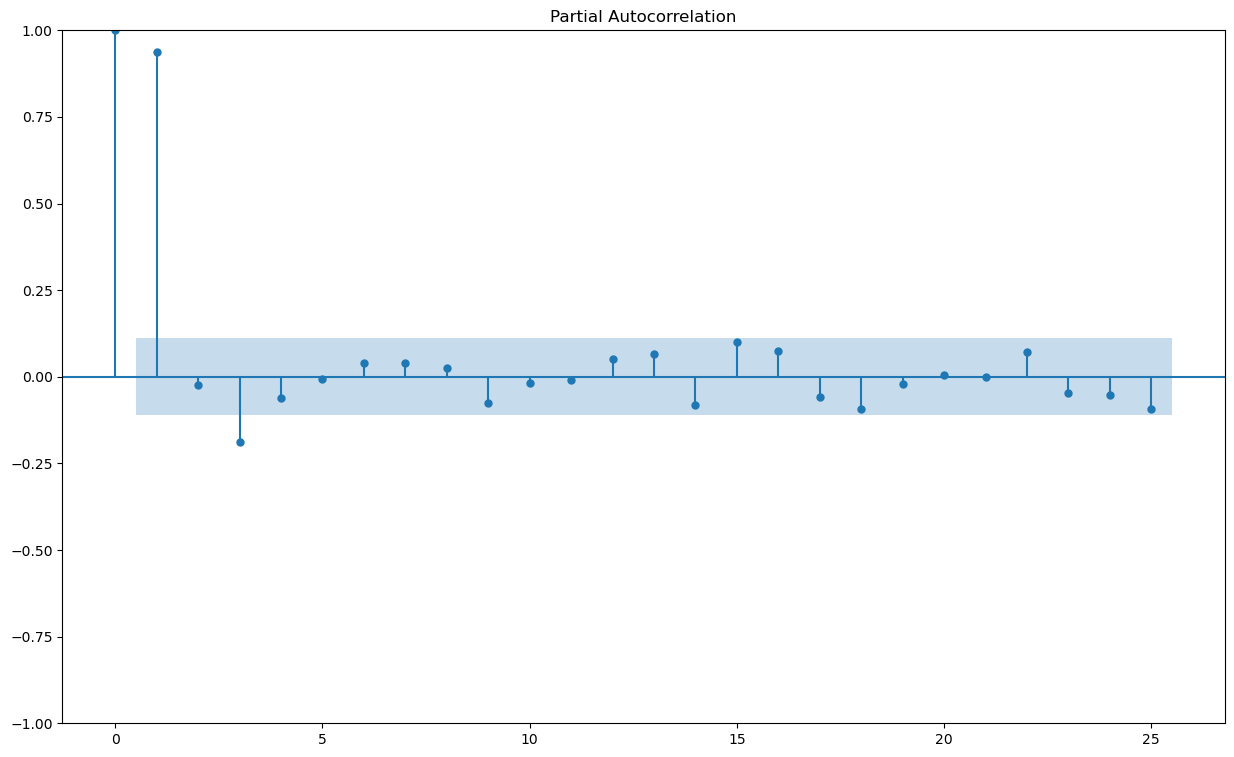

In [11]:
plot_acf(df_50['size_50'])
plot_pacf(df_50['size_50'])
plt.show()

P= 3 D =0 Q = 10 berdasarkan visualisasi acf dan pacf

In [14]:
model_arima_visual = ARIMA(df_50['size_50'], order=(3, 0, 10))
result_model_arima_visual = model_arima_visual.fit()

print('The AIC is ', result_model_arima_visual.aic)

The AIC is  5599.475950268137


aic yang didapat dengan menggunakan P = 3 D = 0 Q = 10 adalah 5599.47

In [13]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[1]
  df['d'] = pdq[2]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

pembuatan fungsi pencarian best model

In [11]:
# Find best model of ARIMA with combinations of p=4, d=4, q=4

find_best_model(df['size_50'], 4, 4, 4)

(4,
 2,
 2,
 10.0,
      p  d  q          AIC
 72   4  2  2    10.000000
 107  1  2  2  5581.452902
 109  1  4  4  5583.516349
 33   1  3  3  5583.992903
 58   1  3  3  5584.301786
 ..  .. .. ..          ...
 21   4  1  1  6116.536686
 15   3  0  0  6128.801960
 45   4  0  0  6261.369505
 0    0  0  0  6306.182482
 20   4  0  0  6496.493909
 
 [125 rows x 4 columns])

pencarian best model menggunakan fungsi dengan combinasi p= 4 d =4 q= 4 didapat aic paling kecil di 10 dengan menggunakan p= 4 d =2 =q 2

In [15]:
train = df_50[:250]
test = df_50[250:]
print(f"Train Size : {train.shape}")
print(f"Test Size : {test.shape}")

Train Size : (250, 1)
Test Size : (64, 1)


jumlah data dibagi menjadi train sebanyak 250 dan test sebanyak 64

In [16]:
# Menggunakan parameter PDQ dari plot visual

model_arima_visual = ARIMA(train['size_50'], order=(3,0,10))
result_model_arima_visual = model_arima_visual.fit()

print("AIC ARIMA Visual :",result_model_arima_visual.aic)

AIC ARIMA Visual : 4488.481127295739


hasil aic train sebesar 4488 dengan menggunakan P=3 d=0 Q=10

In [17]:
arima_pred_test_viz = result_model_arima_visual.predict(start="2023-07-02", end="2024-09-15",dynamic=True)
arima_pred_test_viz = pd.DataFrame(arima_pred_test_viz)
arima_pred_test_viz.columns = ['price_predict_vizplot']

In [18]:
# Concate dengan actual test set
act_vs_pred_sar = pd.concat([test, arima_pred_test_viz],axis=1)
act_vs_pred_sar

,size_50,price_predict_vizplot
2023-07-02,62000.000000,62273.737166
2023-07-09,60000.000000,63167.589914
2023-07-16,59750.000000,64462.572262
2023-07-23,60714.285714,65646.072824
2023-07-30,60904.761905,66232.795698
...,...,...
2024-08-18,68000.000000,68769.555041
2024-08-25,67514.150943,68781.309742
2024-09-01,69307.692308,68798.509013
2024-09-08,68000.000000,68816.268121


In [19]:
print('MAE test  : ', mean_absolute_error(test, arima_pred_test_viz))
print('RMSE test : ', np.sqrt(mean_squared_error(test, arima_pred_test_viz)))

MAE test  :  5062.9128991834295
RMSE test :  6417.019228182414


Hasil MAE setelah dilakukan train dengan menggunakan  P = 3 D = 0 Q = 10 MAE sebesar 5062 dan RMSE 6417 artinya besar jumlah error harga dari data aktual dan data test sebesar 5062 ini relatif kecil dengan patokan harga per 1kg udangnya di kisaran 60.000 hingga 70.000 rupiah

In [20]:
size = int(len(df_50) - 65)
train_v2, test_v2 = df_50['size_50'][0:size], df_50['size_50'][size:len(df_50)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train_v2]
predictions = []

for t in range(len(test_v2)):
    
    model = ARIMA(history, order=(3,0,10))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test_v2[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 61747.475505, expected = 62000.000000
predicted = 62273.737166, expected = 62000.000000
predicted = 62915.843687, expected = 60000.000000
predicted = 61311.808722, expected = 59750.000000
predicted = 60448.132334, expected = 60714.285714
predicted = 61120.839056, expected = 60904.761905
predicted = 61028.424374, expected = 61909.090909
predicted = 62246.996463, expected = 60500.000000
predicted = 61303.779402, expected = 62000.000000
predicted = 62186.224380, expected = 61333.333333
predicted = 62104.140807, expected = 62000.000000
predicted = 62767.798561, expected = 62071.428571
predicted = 63252.079458, expected = 62000.000000
predicted = 62826.928072, expected = 62000.000000
predicted = 62230.579643, expected = 62000.000000
predicted = 62429.974440, expected = 61814.814815
predicted = 62407.002342, expected = 65000.000000
predicted = 65259.158497, expected = 62750.000000
predicted = 64225.243032, expected = 62500.000000
predicted

In [21]:
# Menghitung MAPE
mape = np.mean(np.abs((test_v2 - predictions) / test_v2)) * 100

print('MAPE test : ', mape)

MAPE test :  1.6906953440747046


besar MAPE test 1.69 yang artinya percentage error harga dari prediksi dan actual hanya 1.69%

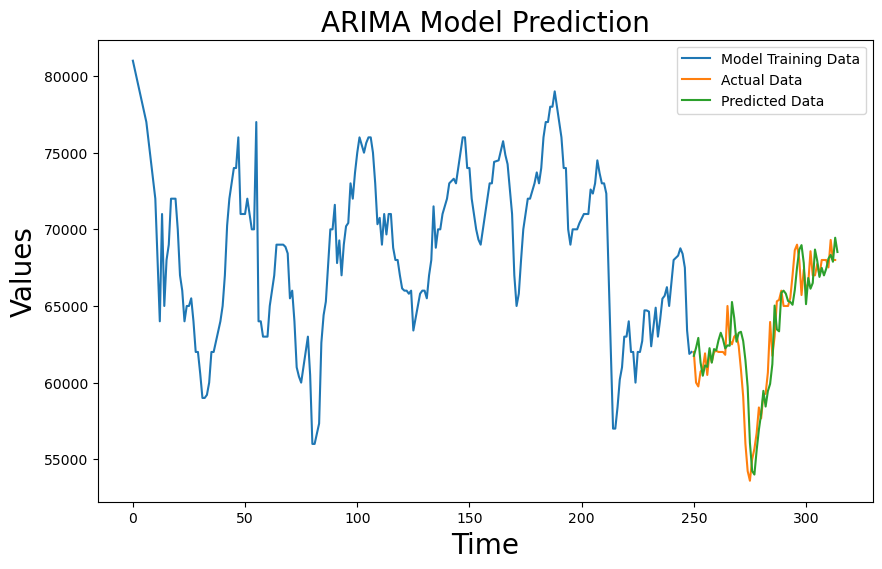

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot training data
plt.plot(range(len(train)), train, label='Model Training Data')

# Plot actual data (test set)
plt.plot(range(len(train), len(train) + len(test)), test, label='Actual Data')

# Plot predicted data
plt.plot(range(len(train), len(train) + len(predictions)), predictions, label='Predicted Data')

# Add labels and title
plt.xlabel('Time', size=20)
plt.ylabel('Values', size=20)
plt.title('ARIMA Model Prediction', size=20)
plt.legend()

# Show plot
plt.show()

visualiasi Harga udang size 50 yang dilakukan yang test pada data ke 250 hingga data ke 314 dari visualiasi cukup bagus karna harga prediksi tidak begitu jauh dengan harga aktual nya

In [23]:
# Save the best model
with open('model50.pkl', 'wb') as model50_file:
  pickle.dump(result_model_arima_visual, model50_file)

# SARIMA

In [24]:
# Splitting dataset

train_sar = df_50[:250]
test_sar = df_50[250:]

print('Train size : ', train_sar.shape)
print('Test size : ', test_sar.shape)

Train size :  (250, 1)
Test size :  (64, 1)


Pembagian data train dan data test

In [25]:

# Train using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

sar=SARIMAX(train_sar['size_50'], order=(3,0,10),seasonal_order=(3,0,10, 27)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              size_50   No. Observations:                  250
Model:             SARIMAX(3, 0, 10)x(3, 0, 10, 27)   Log Likelihood               -2235.294
Date:                              Tue, 24 Sep 2024   AIC                           4524.587
Time:                                      16:42:06   BIC                           4619.667
Sample:                                  09-16-2018   HQIC                          4562.854
                                       - 06-25-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6115      0.090     -6.795      0.000      -0.788      -0.435
ar.L2          0.6775      0.052     13.040      0.000       0.576       0.779
ar.L3          0.9337      0.076     12.250      0.000       0.784       1.083
ma.L1          1.5574      0.099     15.738      0.000       1.363       1.751
ma.L2          1.0380      0.138      7.523      0.000       0.768       1.308
ma.L3          0.2486      0.142      1.752      0.080      -0.030       0.527
ma.L4          0.1600      0.173      0.927      0.354      -0.178       0.498
ma.L5         -0.1756      0.165     -1.065      0.287      -0.499       0.147
ma.L6         -0.3738      0.157     -2.379      0.017      -0.682      -0.066
ma.L7         -0.4836      0.188     -2.577      0.010      -0.851      -0.116
ma.L8         -0.3985      0.197     -2.019      0.043      -0.785      -0.012
ma.L9         -0.2603      0.162     -1.610      0.107      -0.577       0.057
ma.L10        -0.1043      0.096     -1.086      0.278      -0.293       0.084
ar.S.L27      -0.5166      4.203     -0.123      0.902      -8.754       7.721
ar.S.L54       0.6748     10.160      0.066      0.947     -19.239      20.588
ar.S.L81       0.7330      4.116      0.178      0.859      -7.334       8.800
ma.S.L27       0.4145      4.588      0.090      0.928      -8.579       9.408
ma.S.L54      -0.7772     10.294     -0.076      0.940     -20.953      19.398
ma.S.L81      -0.8169      5.131     -0.159      0.874     -10.873       9.239
ma.S.L108     -0.0967      0.617     -0.157      0.875      -1.306       1.113
ma.S.L135      0.0370      1.863      0.020      0.984      -3.614       3.688
ma.S.L162      0.1572      1.220      0.129      0.897      -2.235       2.549
ma.S.L189      0.0831      0.650      0.128      0.898      -1.191       1.358
ma.S.L216      0.0386      0.428      0.090      0.928      -0.801       0.878
ma.S.L243      0.1044      0.645      0.162      0.871      -1.159       1.368
ma.S.L270     -0.0444      1.235     -0.036      0.971      -2.464       2.376
sigma2      3.188e+06    1.4e-05   2.27e+11      0.000    3.19e+06    3.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               660.86
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+28. Standard errors may be unstable.
"""

AIC yang didapat setelah dilakukan modeling menggunakan sarimax didapat aic 4524

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict test-set
sar_pred_test = sar.predict(start="2023-07-02", end="2024-09-15", dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['size_50_predict']

# Reset index for alignment
test_sar_reset = test_sar['size_50'].reset_index(drop=True)
sar_pred_test_reset = sar_pred_test['size_50_predict'].reset_index(drop=True)

# Concatenate predictions with actual values
act_vs_pred_sar = pd.concat([test_sar_reset, sar_pred_test_reset], axis=1)

# Check the MAE & RMSE
mae_test = mean_absolute_error(test_sar_reset, sar_pred_test_reset)
rmse_test = np.sqrt(mean_squared_error(test_sar_reset, sar_pred_test_reset))

print('MAE test  : ', mae_test)
print('RMSE test : ', rmse_test)

# Display actual vs predicted
print(act_vs_pred_sar)


MAE test  :  2753.517155018356
RMSE test :  3545.5094409860694
         size_50  size_50_predict
0   62000.000000     61355.165055
1   60000.000000     62542.576236
2   59750.000000     62714.511433
3   60714.285714     63449.223676
4   60904.761905     63028.447915
..           ...              ...
59  68000.000000     64219.971310
60  67514.150943     64638.710805
61  69307.692308     64094.666594
62  68000.000000     64061.374701
63  68000.000000     63819.729639

[64 rows x 2 columns]


Hasil dari melatih model terhadap data test didapat MAE sebesar 2753 dan RMSE 3545

In [27]:
# Menghitung MAPE dengan menangani pembagian dengan nol
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Mengabaikan nilai aktual yang sama dengan nol untuk menghindari pembagian dengan nol
    non_zero_idx = y_true != 0
    y_true_non_zero = y_true[non_zero_idx]
    y_pred_non_zero = y_pred[non_zero_idx]
    
    # Hitung MAPE hanya pada data yang tidak memiliki nilai aktual nol
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100
    return mape

# Contoh penggunaan
mape_test = mean_absolute_percentage_error(test_sar_reset, sar_pred_test_reset)
print('MAPE test: ', mape_test)


MAPE test:  4.5070569497146336


MAPE test data test dengan predict test sebesar 4.5%

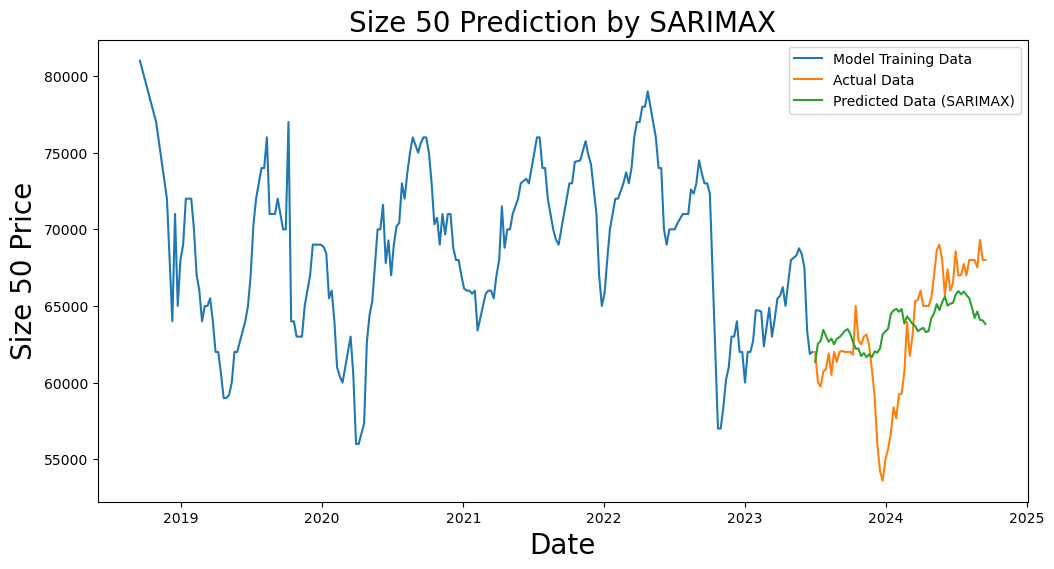

In [28]:
import matplotlib.pyplot as plt

# Plotting the SARIMAX model results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_sar['size_50'], label='Model Training Data')

# Plot actual test data
plt.plot(test_sar['size_50'].index, test_sar['size_50'], label='Actual Data')

# Plot predicted test data
plt.plot(test_sar['size_50'].index, sar_pred_test_reset, label='Predicted Data (SARIMAX)')

# Adding labels, title, and legend
plt.xlabel('Date', size=20)
plt.ylabel('Size 50 Price', size=20)
plt.title('Size 50 Prediction by SARIMAX', size=20)
plt.legend()

# Show plot
plt.show()


Visualisasi Grafik Harga udang size 50 pada yang dimulai pada pertengahan tahun 2023 hingga pertengahan tahun 2024.Dari visualisasi yang didapat Grafik prediksi harga menggunakan model sarima dan grafik data actual cukup berbeda secara signifikan dikarnakan MAE TEST yang tinggi dan juga MAPE Test yang tinggi membuat grafik cukup berbeda dibandingkan dengan menggunakan model arima


# Conclusion

Setelah dilakukan Uji Data test dengan penggunaan 2 model ARIMA dan SARIMA maka model yang akan dipilih untuk penggunaan aplikasi UJATIM adalah model ARIMA, ini dikarenakan berdasarkan MAE dan MAPE test yang didapat dengan menggunakan Model ARIMA cenderung lebih rendah dibandingkan dengan penggunaan model SARIMA